### Pulling in LEV files and to Construct Deployment, Well, and Data Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os, glob, linecache, uuid, json
import xml.etree.ElementTree as ETE
import seaborn as sns
from copy import deepcopy
import shutil
from scipy.stats import zscore
import re
import sys
import ipdb
import json
from datetime import timedelta
from hampel import hampel
from sklearn.ensemble import IsolationForest
uuid_gen = uuid.uuid4()

den_api_lib_path = "C:\\Users\\jinsu.elhance\\Box\\000. Jinsu Elhance\\Github\\dendra-api-client-python"
sys.path.append(den_api_lib_path)
import dendra_api_client as dendra

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Authentication
# If you have a login and the data is not public, you must authenticatte using your Dendra login
dendra.authenticate('jinsu.elhance@tnc.org')

········


In [5]:
data_dir = "C:/Users/jinsu.elhance/Box/Wells/WellsDatasheets/HistoricalWellSynthesis/Data/Dendra_Uploads"
well_info = pd.read_csv(f"C:/Users/jinsu.elhance/Box/Wells/WellsDatasheets/HistoricalWellSynthesis/Data/JLDP_Wells_0.csv")
data_paths = glob.glob("C:/Users/jinsu.elhance/Box/Wells/WellsDatasheets/HistoricalWellSynthesis/Data/Dendra_Uploads/*.csv")
dendra_dir = "C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/"
well_info['Elevation_ft'] = well_info['Elevation_m'] * 3.28084 

# Create a Station for each Well

In [4]:
# template = {
#     "description": "Groundwater well @ Dangermond Preserve",
#     "full_name": "Dangermond WELLNAME",
#     "geo": {
#         "type": "Point",
#         "coordinates": []
#     },
#     "is_active": True,
#     "is_enabled": True,
#     "is_geo_protected": False,
#     "is_hidden": False,
#     "is_stationary": True,
#     "name": "Dangermond WELL NAME",
#     "slug": "dangermond-wellname",
#     "state": "ready",
#     "time_zone": "PST",
#     "organization_id": "5eb41ff0883adf89568569d0",
#     "utc_offset": -28800,
#     "station_type": "weather",
#     "version_id": "64d407aaf1438da10a4dd1fd",
#     "created_at": "",
#     "updated_at": "",
#     "created_by": "6355f379b055ac27fb8427c7",
#     "updated_by": "6355f379b055ac27fb8427c7",
#     "access_levels_resolved": {
#         "member_level": 3,
#         "public_level": 3
#     },
#     "general_config_resolved": {
#         "brand_color": "2E7D32",
#         "default_time_zone": "PST",
#         "loggernet_server": "csi.dendra.science:60601",
#         "sample_interval": 600000,
#         "station_offline_threshold": 240
#     },
#     "organization_lookup": {
#         "name": "The Nature Conservancy",
#         "slug": "tnc"
#     }
# }

# json_objects = []

# for i, well in well_info.iterrows():
#     well_data = deepcopy(template)
#     well_data["full_name"] = well_data["full_name"].replace("WELLNAME", well['Well_Name'])
#     well_data["name"] = well_data["name"].replace("WELL NAME", well['Well_Name'])
#     well_data['slug'] = well_data['slug'].replace('wellname', well['Well_Name'].lower().replace(" ",""))
#     well_data["geo"] = {
#         'type' : 'Point',
#         'coordinates' : [float(well.x), float(well.y), float(well.Elevation_m)]
#     }
    
#     # Write the JSON objects to a file
#     with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Stations/{well['Well_Name']}.station.json", 'w') as json_file:
#         json.dump(well_data, json_file, indent=4)

# Create Datastreams for each Well

In [5]:
# datastreams = [("level", "xle_lev"), ("temperature", "xle_lev"), ("temperature", "xlsx"), ("level", "xlsx")]
# datastream_template_paths = ["xle_lev_level.json", "xlsx_level.json", "xle_lev_temp.json", "xlsx_temp.json"]
# datastream_templates = []

# for t in datastream_template_paths: 
#     with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/{t}") as template_raw:
#         datastream_templates.append(deepcopy(json.load(template_raw)))
        
# #get station names and slugs
# datastreams_glob = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Requests/*.json")
# station_glob = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Stations/64*.json")

# for station_path in station_glob:
#     with open(station_path, "r") as station_file:
#         station_data = json.load(station_file)
#         station_name = station_data['slug'].lower().replace("dangermond-", "")
#         for i in range(4):
#             datastream = datastreams[i]
#             if os.path.exists(f"C:/Users/jinsu.elhance/Box/Wells/WellsDatasheets/HistoricalWellSynthesis/Data/Dendra_Uploads/{station_name}_dendra_{datastream[1]}.csv"):
# #                 print(station_name, datastream)
#                 datastream_template = deepcopy(datastream_templates[i])
#                 datastream_template['datapoints_config'][0]["params"]["query"]["fc"] = datastream_template['datapoints_config'][0]["params"]["query"]["fc"].replace("WELL", station_name)
#                 datastream_template['description'] = datastream_template['description'].replace("STATIONNAME", station_data['full_name'].replace("Dangermond ", ""))
#                 datastream_template['datapoints_config_refd'][0]['params']['query']['fc'] = datastream_template['datapoints_config'][0]["params"]["query"]["fc"]
#                 datastream_template['station_id'] = station_data['_id']
    #              Write the JSON objects to a file
#                 with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Requests/{station_name}.{datastream[0]}.{datastream[1]}.datastream.json", 'w') as json_file:
#                     json.dump(datastream_template, json_file, indent=4)

## Hide Empty Datastreams (Troubleshooting)

In [6]:
#Hide datastreams on hidden stations
# hidden_stations = []

# station_glob = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Stations/64*.json")

# for station_path in station_glob:
#     with open(station_path, "r") as station_file:
#         station_data = json.load(station_file)
#         if station_data['is_hidden'] == True:
#             hidden_stations.append(station_data["_id"])
            
# datastreams_glob = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Requests/64*.json")

# for datastream_path in datastreams_glob:
#     with open(datastream_path, "r") as datastream_file:
#         datastream_data = json.load(datastream_file)
#         if datastream_data['station_id'] in hidden_stations:
#             datastream_data['is_hidden'] = True
#     #              Write the JSON objects to a file
#             with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Requests/patch.{datastream_data['_id']}.datastream.json", 'w') as json_file:
#                 json.dump(datastream_data, json_file, indent=4)

# Create Annotations for Data Gaps

In [7]:
# dendra_data_dir = "C:\\Users\\jinsu.elhance\\Box\\Wells\\WellsDatasheets\\HistoricalWellSynthesis\\Data\\Dendra_Uploads"

# dendra_data_glob = glob.glob(dendra_data_dir + "\*.csv")

In [8]:
#Using well data uploaded to dendra, find starts and ends of data gaps to create annotations with
# gap_markers = pd.read_csv("Dendra_Anno_Gap_Markers.csv")

#The code below writes gap_markers
# well_data_list = []

# for data_f in dendra_data_glob:
#     well = os.path.basename(data_f).replace("_dendra", "").replace("_xle_lev.csv", "").replace("_xlsx.csv", "")
#     well_data = pd.read_csv(data_f)
#     well_data['well'] = well
#     well_data['TIMESTAMP'] = pd.to_datetime(well_data['TIMESTAMP'])
#     well_data['tdelta'] = well_data['TIMESTAMP'].diff()
#     well_data_list.append(well_data)
    
# well_data_full = pd.concat(well_data_list)
# well_data_full.head()

# gap_finder = well_data_full.loc[well_data_full['tdelta'] > timedelta(days=1)]
# gap_finder['gap_start'] = gap_finder['TIMESTAMP'] - gap_finder['tdelta']
# gap_ends = gap_finder.groupby(gap_finder['TIMESTAMP'].map(lambda x: (x.year, x.month, x.day)))['well'].agg(lambda x: set(x))
# gap_starts = gap_finder.groupby(gap_finder['gap_start'].map(lambda x: (x.year, x.month, x.day)))['well'].agg(lambda x: set(x))

In [5]:
#Hide datastreams on hidden stations
stations_dict = {}

station_glob = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Stations/64*.json")

for station_path in station_glob:
    with open(station_path, "r") as station_file:
        station_data = json.load(station_file)
        stations_dict[station_data['slug'].replace("dangermond-", "")] = (station_data["_id"])
            
# datastreams_glob = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Requests/64*.json")

# for datastream_path in datastreams_glob:
#     with open(datastream_path, "r") as datastream_file:
#         datastream_data = json.load(datastream_file)
#         if datastream_data['station_id'] in hidden_stations:
#             datastream_data['is_hidden'] = True
#     #              Write the JSON objects to a file
#             with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Requests/patch.{datastream_data['_id']}.datastream.json", 'w') as json_file:
#                 json.dump(datastream_data, json_file, indent=4)

In [10]:
# with open(f"C:\\Users\\jinsu.elhance\\Box\\000. Jinsu Elhance\\DendraWork\\Annotations\\template.annotation.json", encoding="utf-8") as anno_template_file:
    
#     anno_template_json = json.load(anno_template_file)
#     anno_template_json['station_ids'] = []
#     anno_template_json['intervals'] = []
    
#     for i, anno in gap_markers.iterrows():
#         anno_template = deepcopy(anno_template_json)
#         wells = anno['wells'].split("-")
#         anno_template['intervals'].append({
#             "begins_at":f"{anno['BEGIN_DATE']}T00:00:00.000Z",
#             "ends_before":f"{anno['END_DATE']}T23:59:00.000Z",
#         })
#         anno_template['title'] = anno_template['title'].replace("START", str(anno['BEGIN_DATE'])).replace("END", str(anno['END_DATE']))
#         anno_template['station_ids'] = [stations_dict[well] for well in wells]
        
#       Write the JSON objects to a file
#         with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Annotations/{anno['BEGIN_DATE']}.annotation.json", 'w') as json_file:
#             json.dump(anno_template, json_file, indent=4)

In [134]:
def find_discrete_ts(df):
    df['tdelta'] = df['timestamp_utc'].diff()
    gap_finder = df.loc[df['tdelta'] > timedelta(days=7)]
    tseries = []

    indices = np.append([0], gap_finder.index.values)
    indices = np.append(indices, df.index.values[-1]+1)

    indexr = [(indices[i-1], indices[i]-1) for i in range(1, len(indices))]
    
#     For each gap, section our the data
    for _indexr in indexr:
        tseries.append(df[_indexr[0]:_indexr[1]])
        
    return tseries

In [210]:
# datastream_df_dict = {}

#Create empty anno json
with open(f"C:\\Users\\jinsu.elhance\\Box\\000. Jinsu Elhance\\DendraWork\\Annotations\\outlier_template.annotation.json", encoding="utf-8") as anno_template_file:
    
    anno_template_json = json.load(anno_template_file)
    
anno_template_json = deepcopy(anno_template_json)
anno_template_json['datastream_ids'] = []

#Interval looks like:
"""
'intervals':[
{'begins_at' : '2010-02-23T19:30:00.000',
 'ends_before' : '2010-02-23T19:30:00.000'},
 ...
]
"""

#Query Dendra API to fetch Datapoints for each stream (from Station IDs)
for station_name in stations_dict:
    station_id = stations_dict[station_name]
    station_datastreams = dendra.list_datastreams_by_station_id(station_id)
    
    for datastream in station_datastreams: 
        datastream_id = datastream['_id']
        dendra_fetch = dendra.get_datapoints(datastream_id, begins_at="2000-01-01T00:00:00", time_type="local").reset_index()
        dendra_fetch = dendra_fetch.rename(columns={dendra_fetch.columns[2]:"v"})
        
        if dendra_fetch.shape[0] == 0:
            continue
            
        outlier_anno = deepcopy(anno_template_json)
        outlier_indices = []
        
        #Iterate over any contiguous sections of timeseries data and find outliers.
        for ts in find_discrete_ts(dendra_fetch):
            clf = IsolationForest(random_state=0, contamination=0.0005).fit(ts[['v']])
            ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
            outlier_indices = np.append(outlier_indices, ts.loc[ts['outlier'] == -1].index)
        
        #Add indices where values are non-positive
        outlier_indices = np.append(outlier_indices, list(dendra_fetch.loc[dendra_fetch.v <= 0].index.values)).astype(int)
        
        if len(outlier_indices) == 0:
            continue
        
        #Create outlier anno timestamp objects
        time_stamps = [{
            'begins_at': str(dendra_fetch.iloc[index]['timestamp_utc']).replace(" ","T").replace("+00:00",".000Z"),
            'ends_before': str(dendra_fetch.iloc[index]['timestamp_utc']).replace(" ","T").replace("+00:00",".000Z")
        } for index in outlier_indices]
        
        #Create annotation object
        outlier_anno['datastream_ids'] = [datastream_id]
        outlier_anno['intervals'] = time_stamps
        outlier_anno['station_ids'] = [station_id]
        outlier_anno['title'] = f"Outlier Filter for {station_id}:{datastream['name']}"
        outlier_anno['description'] = "Isolation Forest Outlier Filter + Removing Negative Points"

        print(f"{station_name}:{datastream['name']}:{len(time_stamps)} outliers found")
#         Write the JSON objects to a file
        with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Annotations/{datastream_id}.outliers.annotation.json", 'w') as json_file:
            json.dump(outlier_anno, json_file, indent=4)

[(0, 22179), (22180, 30137)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido1:Well Water Level xle/lev:15 outliers found
[(0, 25827), (25828, 54023)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido1:Well Water Level xlsx:16 outliers found
[(0, 22179), (22180, 30137)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido1:Well Water Temperature xle/lev:13 outliers found
[(0, 25827), (25828, 54023)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido1:Well Water Temperature xlsx:26 outliers found
[(0, 21714), (21715, 30269), (30270, 39962), (39963, 79943)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido3b:Well Water Level xle/lev:17784 outliers found
[(0, 25362), (25363, 52790)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido3b:Well Water Level xlsx:16 outliers found
[(0, 21714), (21715, 30269), (30270, 39962), (39963, 79943)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido3b:Well Water Temperature xle/lev:35 outliers found
[(0, 25362), (25363, 52790)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido3b:Well Water Temperature xlsx:20 outliers found
[(0, 21709), (21710, 30267), (30268, 38222)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido2:Well Water Level xle/lev:1 outliers found
[(0, 42925), (42926, 47025)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido2:Well Water Level xlsx:5011 outliers found
[(0, 21709), (21710, 30267), (30268, 38222)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido2:Well Water Temperature xle/lev:9 outliers found
[(0, 42925), (42926, 47025)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido2:Well Water Temperature xlsx:5003 outliers found
[(0, 21503), (21504, 61495)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

[(0, 25151), (25152, 53348)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido4:Well Water Level xlsx:8 outliers found
[(0, 21503), (21504, 61495)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido4:Well Water Temperature xle/lev:27 outliers found
[(0, 25151), (25152, 53348)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido4:Well Water Temperature xlsx:23 outliers found
[(0, 8561), (8562, 16322), (16323, 56318)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido5:Well Water Level xle/lev:4 outliers found
[(0, 8561), (8562, 16322), (16323, 56318)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

escondido5:Well Water Temperature xle/lev:25 outliers found
[(0, 19007), (19008, 27469), (27470, 37249)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

lowerjalamavaqueros:Well Water Level xle/lev:15 outliers found
[(0, 19007), (19008, 23105)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

lowerjalamavaqueros:Well Water Level xlsx:11 outliers found
[(0, 19007), (19008, 27469), (27470, 37249)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

lowerjalamavaqueros:Well Water Temperature xle/lev:13 outliers found
[(0, 19007), (19008, 23105)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

lowerjalamavaqueros:Well Water Temperature xlsx:7 outliers found
[(0, 22279), (22280, 47623), (47624, 93498)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

oaks2:Well Water Level xle/lev:10 outliers found
[(0, 25927), (25928, 53953)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

oaks2:Well Water Level xlsx:20 outliers found
[(0, 22279), (22280, 47623), (47624, 93498)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

oaks2:Well Water Temperature xle/lev:36 outliers found
[(0, 25927), (25928, 53953)]


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.loc[:, 'outlier'] = clf.predict(ts[['v']])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgeopy\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\jinsu.elhance\AppData\Local\Temp\ipykernel_16152\2764186386.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

oaks2:Well Water Temperature xlsx:26 outliers found


ConnectionError: HTTPSConnectionPool(host='api.edge.dendra.science', port=443): Max retries exceeded with url: /v2/datapoints?datastream_id=64dd3e8280818790e3c90538&time%5B%24gte%5D=2000-01-01T00%3A00%3A00&time%5B%24lt%5D=2023-09-05T09%3A10%3A45&%24sort%5Btime%5D=1&%24limit=2016&time_local=true&time%5B%24gt%5D=2021-05-25T12%3A15%3A00.000 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000181BD3BB460>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

# Create Derived Datastreams

# Create Depth to Groundwater Datastreams

In [33]:
with open(f"{dendra_dir}\\Datastreams\\Derived\\depthtogw\\depthtogroundwater.json", encoding="utf-8") as d2g_template_file:
    d2g_template_json = json.load(d2g_template_file)
d2g_template_json = deepcopy(d2g_template_json)

existing_d2g_station_ids = [dendra.get_meta_datastream_by_id(d2g['_id'])['station_id'] for d2g in dendra.list_datastreams_by_query(query_add={"name":"Depth to Groundwater"})]

for well in dendra.list_stations(orgslug='tnc',query_add={"description":"Groundwater well @ Dangermond Preserve"}):
    if well['_id'] in existing_d2g_station_ids:
        continue

    well_meta = dendra.get_meta_station_by_id(well['_id'])
    
    level_stream = dendra.list_datastreams_by_station_id(well['_id'], query_add={"name":"Well Water Level"})
    if level_stream == []:
        print(well_meta['name'])
        continue
    
    #Create Derived Depth to Groundwater Datastream
    d2g_json = deepcopy(d2g_template_json)
    d2g_json['derived_from_datastream_ids'] = [level_stream[0]['_id']]
    d2g_json['station_id'] = well['_id']
    d2g_json['geo'] = well_meta['geo']
    d2g_json['attributes']['well_elevation_m'] = well_meta['geo']['coordinates'][2]
    
    with open(f"{dendra_dir}/Datastreams/Derived/depthtogw/{well['name']}.d2g.derived.datastream.json", 'w') as json_file:
        json.dump(d2g_json, json_file, indent=4)

Dangermond Tinta 5B
Dangermond Tinta 8
Dangermond Tinta 9
Dangermond Upper Espada
Dangermond Vaqueros
Dangermond Wood Canyon


# Create Barometric Corrections

In [33]:
#Identify dates for which Barometric readings are available

#convert milibar readings from weather stations to inHg to ftHg
#mb * 0.0334553
#https://www.fondriest.com/pdf/solinst_levelogger_manual.pdf

#Correct barometer readings for the barologger station elevation
#Typically, barometers correct for wells within 30km and 300m of elevation change 

#Create test barocorrection datastream/annotation

#Convert 
#From weather stations:
baro_dates = {
    "Dangermond_Oaks" : "2021-05-14", #195 meters,
    "Oaks 3B" : "2009-10-30 to 2011-05-31",
    "Tinta 3B" : "2011-04-21 to 2011-05-31",
    "K7AZ": "2016-6 to 2018-10-11",
    "K7AZ": "2020-01-01 to 2021-05-14"
}

#Dendra get every station
stations = dendra.list_stations(orgslug='tnc',query_add={"description":"Groundwater well @ Dangermond Preserve"})
station_metas = [dendra.get_meta_station_by_id(station['_id']) for station in stations] 
station_elevations = {}

    
#Find elevation delta

In [69]:
#Dendra get every station so that we can copy their attributes to their children datastreams
#This can be automated in the datastream creation phase of the automation script. 
stations = dendra.list_stations(orgslug='tnc',query_add={"description":"Groundwater well @ Dangermond Preserve"})
station_metas = [dendra.get_meta_station_by_id(station['_id']) for station in stations] 
station_elevations = {}

for station in station_metas:
    if len(station['geo']['coordinates']) == 3: #Check station has an elevation
        print('\n', station['name'])
        datastreams = dendra.list_datastreams_by_station_id(station['_id'])
        datastream_metas = [dendra.get_meta_datastream_by_id(datastream['_id']) for datastream in datastreams] 

        for datastream in datastream_metas:
            datastream['geo'] = station['geo'] #pass geo coordinates to datastream
            
            if 'attributes' in datastream.keys():
                datastream['attributes']['well_elevation_m'] = station['geo']['coordinates'][2]
            else:
                datastream['attributes'] = {'well_elevation_m': station['geo']['coordinates'][2]}
            print(datastream['name'])
            
            with open(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Datastreams/Patches/{datastream['_id']}.datastream.json", 'w') as json_file:
                json.dump(datastream, json_file, indent=4)

#Then run den meta patch-datastreams --filespec=*.datastream.json in the Patches folder.

Dangermond Alegria
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Alexander Ramajal
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Buckhorn 1
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Buckhorn 2
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Cojo Canyon
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Damsite Canyon
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 


Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Vaqueros
Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Venadito 1
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 

Dangermond Venadito 2
Well Water Level 

Well Water Level xle/lev 

Well Water Level xlsx 

Well Water Temperature 

Well Water Temperature xle/lev 

Well Water Temperature xlsx 



In [80]:
baro_list = glob.glob(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Data/Barometer/KVBG*.csv")
sel_cols = lambda x: x in [0,1,2,3,4,5,7]
kvbg_baro = pd.concat([pd.read_csv(file, skiprows=sel_cols) for file in baro_list])

In [81]:
# kvbg_baro.head()
kvbg_baro = kvbg_baro.drop_duplicates(subset=['Date_Time'], keep="first")
kvbg_baro['Date_Time'] = kvbg_baro['Date_Time'].apply(lambda x: x[:15])
kvbg_baro['Date_Time'] = pd.to_datetime(kvbg_baro['Date_Time'], format = "%m/%d/%Y %H:%M")

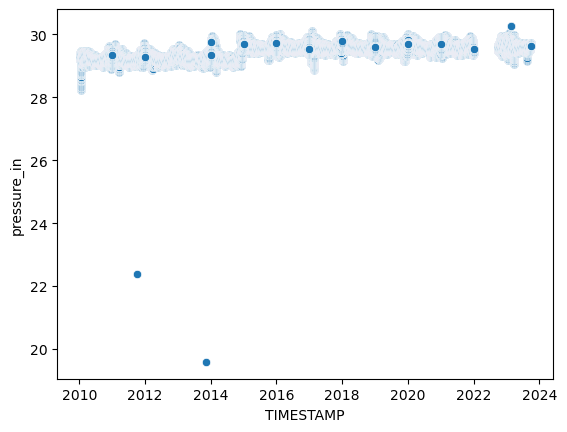

In [83]:
sns.scatterplot(data = dendra_baro, x="TIMESTAMP", y="pressure_in");

In [18]:
baro = pd.read_csv(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Data/Barometer/K7AZ_baro.csv")

In [82]:
dendra_baro = kvbg_baro[['Date_Time', "pressure_set_1d"]].reset_index()
dendra_baro = dendra_baro.rename(columns={"Date_Time":"TIMESTAMP", "pressure_set_1d":"pressure_in", "index":"seq_id"})
dendra_baro.to_csv(f"C:/Users/jinsu.elhance/Box/000. Jinsu Elhance/DendraWork/Data/Barometer/KVBG_baro_dendra.csv")